<a href="https://colab.research.google.com/github/2303a51667/Python_DataScience/blob/main/ProjectIEEE_1667.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training: Logistic Regression

Classification Report for Logistic Regression:

                precision    recall  f1-score   support

          ARTS       0.40      0.09      0.15        43
ARTS & CULTURE       0.50      0.02      0.05        41
  BLACK VOICES       0.49      0.22      0.30       134
      BUSINESS       0.53      0.33      0.41       179
       COLLEGE       0.38      0.10      0.16        29
        COMEDY       0.62      0.21      0.32       146
         CRIME       0.56      0.37      0.45       102
CULTURE & ARTS       1.00      0.03      0.06        30
       DIVORCE       0.88      0.49      0.63        94
     EDUCATION       0.67      0.07      0.12        29
 ENTERTAINMENT       0.43      0.74      0.54       487
   ENVIRONMENT       1.00      0.07      0.13        44
         FIFTY       0.00      0.00      0.00        36
  FOOD & DRINK       0.61      0.68      0.64       181
     GOOD NEWS       1.00      0.03      0.05        40
         GREEN       0.

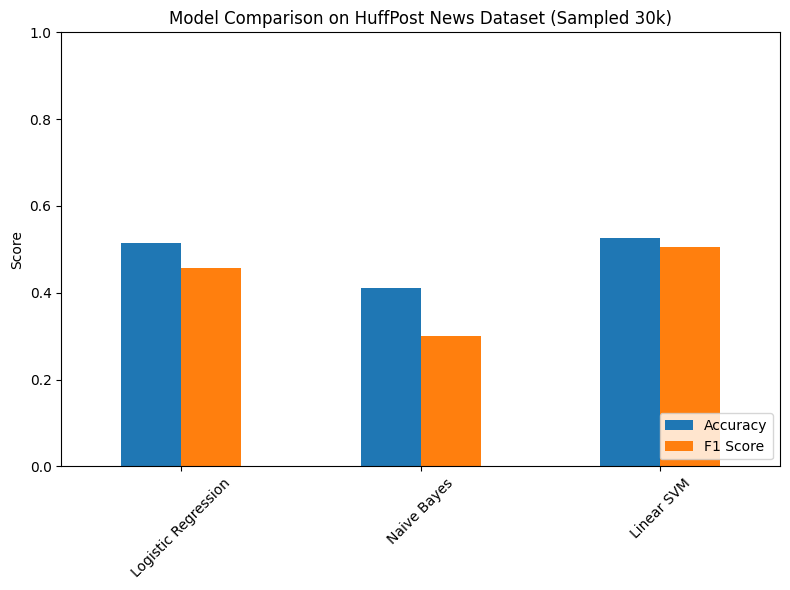

In [3]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# -------------------------------
# STEP 1: Load dataset from ZIP
# -------------------------------
zip_path = "archive (2).zip"   # make sure the ZIP is in same folder

with zipfile.ZipFile(zip_path, "r") as zf:
    with zf.open("News_Category_Dataset_v3.json") as f:
        df = pd.read_json(f, lines=True)

# -------------------------------
# STEP 2: Data Cleaning
# -------------------------------
df["headline"] = df["headline"].fillna("")
df["short_description"] = df["short_description"].fillna("")
df["text"] = df["headline"] + " " + df["short_description"]

# Use a 30k sample for speed (enough for good accuracy)
df = df.sample(30000, random_state=42)

X = df["text"]
y = df["category"]

# -------------------------------
# STEP 3: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# STEP 4: TF-IDF Vectorization
# -------------------------------
vectorizer = TfidfVectorizer(max_features=10000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# -------------------------------
# STEP 5: Models
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
}

results = {}

# -------------------------------
# STEP 6: Train & Evaluate
# -------------------------------
for name, model in models.items():
    print("\n" + "="*60)
    print(f"Training: {name}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Print detailed classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    # Save results
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results[name] = {"Accuracy": acc, "F1 Score": f1}

# -------------------------------
# STEP 7: Plot Comparison
# -------------------------------
df_results = pd.DataFrame(results).T

df_results.plot(kind="bar", figsize=(8,6))
plt.title("Model Comparison on HuffPost News Dataset (Sampled 30k)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


KMeans Silhouette Score: 0.0052

Top terms per KMeans cluster:
Cluster 0: said, trump, says, state, day, police, judge, officials, people, president
Cluster 1: time, day, like, don, season, just, year, ve, summer, things
Cluster 2: people, women, want, business, just, world, day, study, lives, love
Cluster 3: men, divorce, women, marriage, divorced, gay, ex, dating, like, family
Cluster 4: clinton, hillary, trump, sanders, donald, bernie, campaign, debate, support, gop
Cluster 5: week, photos, fashion, funniest, tweets, best, day, new, world, animal
Cluster 6: years, health, care, ago, mental, 10, 20, don, day, life
Cluster 7: make, life, know, want, don, things, love, just, need, way
Cluster 8: new, york, city, year, day, rise, times, huffpost, news, world
Cluster 9: photos, best, style, look, just, like, world, travel, love, ve
Cluster 10: check, pinterest, facebook, twitter, huffpost, tumblr, sure, style, instagram, want
Cluster 11: trump, donald, president, says, gop, white, republ

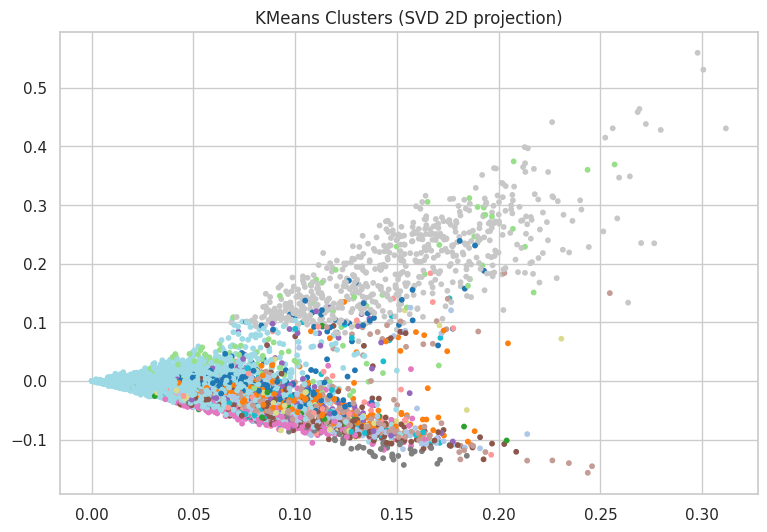

In [3]:
# unsupervised_fast_news.py
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# -------------------------------
# STEP 1: Load dataset
# -------------------------------
zip_path = "archive (2).zip"
with zipfile.ZipFile(zip_path, "r") as zf:
    with zf.open("News_Category_Dataset_v3.json") as f:
        df = pd.read_json(f, lines=True)

df["headline"] = df["headline"].fillna("")
df["short_description"] = df["short_description"].fillna("")
df["text"] = df["headline"] + " " + df["short_description"]

# use only 10k for speed
df = df.sample(10000, random_state=42).reset_index(drop=True)
texts = df["text"].values

# -------------------------------
# STEP 2: TF-IDF (5k features)
# -------------------------------
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_tfidf = tfidf.fit_transform(texts)
feature_names = np.array(tfidf.get_feature_names_out())

# -------------------------------
# STEP 3: KMeans Clustering
# -------------------------------
kmeans = KMeans(n_clusters=15, random_state=42, n_init=5)
labels = kmeans.fit_predict(X_tfidf)

sil = silhouette_score(X_tfidf, labels)
print(f"KMeans Silhouette Score: {sil:.4f}")

# Top words per cluster
print("\nTop terms per KMeans cluster:")
for i, center in enumerate(kmeans.cluster_centers_):
    top_idx = center.argsort()[::-1][:10]
    print(f"Cluster {i}: {', '.join(feature_names[top_idx])}")

# -------------------------------
# STEP 4: NMF Topic Modeling
# -------------------------------
nmf = NMF(n_components=8, random_state=42, max_iter=100)
W = nmf.fit_transform(X_tfidf)

print("\nTop terms per NMF topic:")
for i, comp in enumerate(nmf.components_):
    top_idx = comp.argsort()[::-1][:10]
    print(f"Topic {i}: {', '.join(feature_names[top_idx])}")

# -------------------------------
# STEP 5: Quick 2D Visualization
# -------------------------------
svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X_tfidf)

plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, s=10, cmap="tab20")
plt.title("KMeans Clusters (SVD 2D projection)")
plt.show()


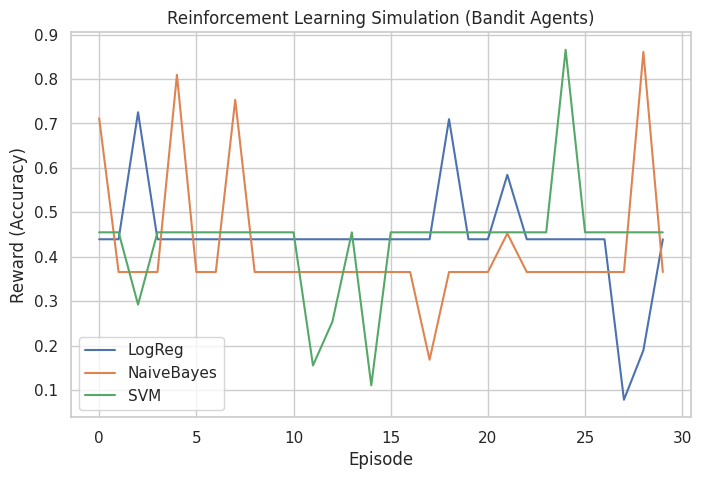


Sample predictions (first 5 test examples):

Text (truncated): bride control costs family feel friends getting groom guest guests keeping low members mother tips weddings
True: WEDDINGS
LogReg  : WEDDINGS
NaiveBayes: WELLNESS
SVM     : WEDDINGS

Text (truncated): age children early easy experience family good italian make recipes taste taught things
True: TRAVEL
LogReg  : FOOD & DRINK
NaiveBayes: WELLNESS
SVM     : FOOD & DRINK

Text (truncated): banks baseball chicago dead legend mr
True: SPORTS
LogReg  : ENTERTAINMENT
NaiveBayes: ENTERTAINMENT
SVM     : SPORTS

Text (truncated): 2013 beginning feel information living people perfect set turned word year years
True: WELLNESS
LogReg  : WELLNESS
NaiveBayes: WELLNESS
SVM     : PARENTING

Text (truncated): biggest black consider funding leaders left lives major matter meet plan washington week
True: POLITICS
LogReg  : POLITICS
NaiveBayes: POLITICS
SVM     : POLITICS


In [5]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# -------------------------------
# STEP 1: Load dataset
# -------------------------------
zip_path = "archive (2).zip"

with zipfile.ZipFile(zip_path, "r") as zf:
    with zf.open("News_Category_Dataset_v3.json") as f:
        df = pd.read_json(f, lines=True)

# -------------------------------
# STEP 2: Preprocess
# -------------------------------
df["headline"] = df["headline"].fillna("")
df["short_description"] = df["short_description"].fillna("")
df["text"] = df["headline"] + " " + df["short_description"]

# smaller sample for speed
df = df.sample(8000, random_state=42)

X = df["text"]
y = df["category"]

le = LabelEncoder()
y_enc = le.fit_transform(y)

# -------------------------------
# STEP 3: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# -------------------------------
# STEP 4: TF-IDF
# -------------------------------
tfidf = TfidfVectorizer(max_features=3000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -------------------------------
# STEP 5: Define bandit "agents"
# -------------------------------
agents = {
    "LogReg": LogisticRegression(max_iter=200),
    "NaiveBayes": MultinomialNB(),
    "SVM": LinearSVC()
}

# -------------------------------
# STEP 6: Multi-armed bandit training
# -------------------------------
rewards = {a: [] for a in agents}
avg_rewards = {a: [] for a in agents}
eps = 0.2  # exploration rate

for episode in range(30):  # episodes = "rounds of training"
    for name, model in agents.items():
        model.fit(X_train_tfidf, y_train)
        preds = model.predict(X_test_tfidf)
        acc = accuracy_score(y_test, preds)
        rewards[name].append(acc)

    # epsilon-greedy update
    for name in agents:
        if random.random() < eps:
            avg_rewards[name].append(random.uniform(0, 1))  # exploration
        else:
            avg_rewards[name].append(np.mean(rewards[name]))  # exploitation

# -------------------------------
# STEP 7: Plot rewards
# -------------------------------
plt.figure(figsize=(8,5))
for name in avg_rewards:
    plt.plot(avg_rewards[name], label=name)
plt.title("Reinforcement Learning Simulation (Bandit Agents)")
plt.xlabel("Episode")
plt.ylabel("Reward (Accuracy)")
plt.legend()
plt.show()

# -------------------------------
# STEP 8: Show sample predictions
# -------------------------------
print("\nSample predictions (first 5 test examples):")
for i in range(5):
    # Convert TF-IDF row back to top words
    words = tfidf.inverse_transform(X_test_tfidf[i])[0][:20]
    print(f"\nText (truncated): {' '.join(words)[:140]}")
    print("True:", le.inverse_transform([y_test[i]])[0])
    for name, model in agents.items():
        pred = model.predict(X_test_tfidf[i])
        print(f"{name:8}:", le.inverse_transform(pred)[0])


Samples: train=4000, test=1000; classes=42

=== Training MLP ===
Epoch 1/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1134 - loss: 3.5829 - val_accuracy: 0.1550 - val_loss: 3.3761
Epoch 2/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1635 - loss: 3.3143 - val_accuracy: 0.1550 - val_loss: 3.3761
Epoch 3/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1725 - loss: 3.2944 - val_accuracy: 0.1550 - val_loss: 3.3676
MLP -> test_acc: 0.1690, time: 3.5s

=== Training CNN ===
Epoch 1/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.1440 - loss: 3.5493 - val_accuracy: 0.1550 - val_loss: 3.3626
Epoch 2/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.1668 - loss: 3.2855 - val_accuracy: 0.1800 - val_loss: 3.3290
Epoch 3/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.2143 - loss: 3.0839 - val_accuracy: 0.1875 - val_loss: 3.2042
CNN -> test_acc: 0.2170, time: 14.2s

=== Training LSTM ===
Epoch 1/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy:

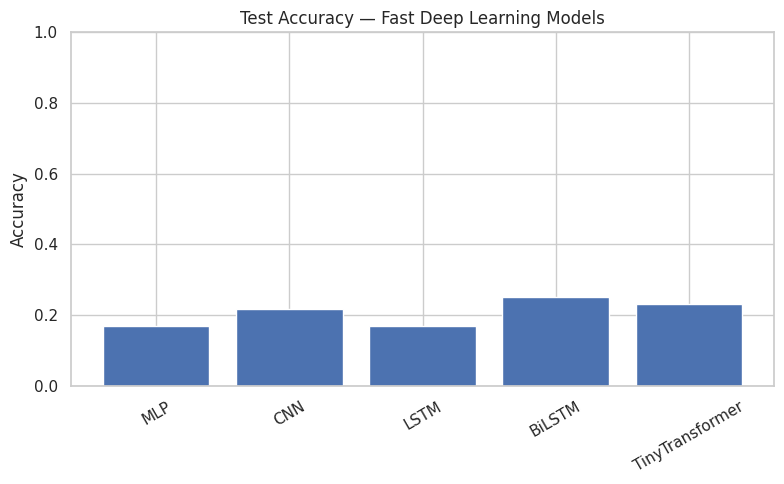


Best model: BiLSTM
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step

Sample predictions (first 5):
Text (trunc): What If We Were All Family Generation Changers? What if, in doing so, we won't just create new opportunities for
True: STYLE & BEAUTY | Pred: WELLNESS
Text (trunc): Firestorm At AOL Over Employee Benefit Cuts It should have been a glorious week for AOL chief executive Tim Armstrong.
True: FOOD & DRINK | Pred: WELLNESS
Text (trunc): Dakota Access Protesters Arrested As Deadline Passes To Depart Camp A few protesters who refused to leave remained at the
True: POLITICS | Pred: POLITICS
Text (trunc): One Glimpse Of These Baby Kit Foxes And You'll Be Hooked
True: TRAVEL | Pred: POLITICS
Text (trunc): Mens' Sweat Pheromone, Androstadienone, Influences Cooperation In Other Men Scientists didn't know if humans played that game as well. But
True: DIVORCE | Pred: WELLNESS


In [6]:
# fast_deep_learning_news.py
import zipfile
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (Input, Embedding, Dense, GlobalAveragePooling1D,
                                     Conv1D, MaxPooling1D, Dropout, Flatten,
                                     LSTM, Bidirectional, GlobalMaxPooling1D,
                                     LayerNormalization, MultiHeadAttention, Add)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# -------------------------
# FAST CONFIG
# -------------------------
ZIP_PATH = "archive (2).zip"
JSON_NAME = "News_Category_Dataset_v3.json"
SAMPLE_SIZE = 5000          # small for speed
VOCAB_SIZE = 5000
MAXLEN = 100
EMB_DIM = 64
BATCH = 64
EPOCHS = 3
RANDOM_STATE = 42

# -------------------------
# LOAD & PREPROCESS
# -------------------------
with zipfile.ZipFile(ZIP_PATH, "r") as zf:
    with zf.open(JSON_NAME) as f:
        df = pd.read_json(f, lines=True)

df["headline"] = df["headline"].fillna("")
df["short_description"] = df["short_description"].fillna("")
df["text"] = (df["headline"] + " " + df["short_description"]).str.strip()

# sample quickly
if SAMPLE_SIZE and len(df) > SAMPLE_SIZE:
    df = df.sample(SAMPLE_SIZE, random_state=RANDOM_STATE).reset_index(drop=True)

texts = df["text"].astype(str).values
labels_raw = df["category"].values

# encode labels
le = LabelEncoder()
y = le.fit_transform(labels_raw)
num_classes = len(le.classes_)
y_cat = to_categorical(y, num_classes)

# tokenize
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
seqs = tokenizer.texts_to_sequences(texts)
X = pad_sequences(seqs, maxlen=MAXLEN, padding="post", truncating="post")

# split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
print(f"Samples: train={len(X_train)}, test={len(X_test)}; classes={num_classes}")

# -------------------------
# MODEL FACTORIES (small & fast)
# -------------------------
def build_mlp(vocab_size=VOCAB_SIZE, emb_dim=EMB_DIM, maxlen=MAXLEN, n_classes=num_classes):
    inp = Input(shape=(maxlen,))
    x = Embedding(vocab_size, emb_dim, input_length=maxlen)(inp)
    x = GlobalAveragePooling1D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.3)(x)
    out = Dense(n_classes, activation="softmax")(x)
    model = Model(inp, out, name="MLP")
    model.compile(optimizer=Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

def build_cnn(vocab_size=VOCAB_SIZE, emb_dim=EMB_DIM, maxlen=MAXLEN, n_classes=num_classes):
    inp = Input(shape=(maxlen,))
    x = Embedding(vocab_size, emb_dim, input_length=maxlen)(inp)
    x = Conv1D(128, 5, activation="relu", padding="same")(x)
    x = MaxPooling1D(2)(x)
    x = Conv1D(128, 3, activation="relu", padding="same")(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.3)(x)
    out = Dense(n_classes, activation="softmax")(x)
    model = Model(inp, out, name="CNN")
    model.compile(optimizer=Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

def build_lstm(vocab_size=VOCAB_SIZE, emb_dim=EMB_DIM, maxlen=MAXLEN, n_classes=num_classes):
    inp = Input(shape=(maxlen,))
    x = Embedding(vocab_size, emb_dim, input_length=maxlen)(inp)
    x = LSTM(96)(x)
    x = Dropout(0.3)(x)
    out = Dense(n_classes, activation="softmax")(x)
    model = Model(inp, out, name="LSTM")
    model.compile(optimizer=Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

def build_bi_lstm(vocab_size=VOCAB_SIZE, emb_dim=EMB_DIM, maxlen=MAXLEN, n_classes=num_classes):
    inp = Input(shape=(maxlen,))
    x = Embedding(vocab_size, emb_dim, input_length=maxlen)(inp)
    x = Bidirectional(LSTM(64))(x)
    x = Dropout(0.3)(x)
    out = Dense(n_classes, activation="softmax")(x)
    model = Model(inp, out, name="BiLSTM")
    model.compile(optimizer=Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

def tiny_transformer_block(x, head_size=32, num_heads=2, ff_dim=64, dropout=0.1):
    # MultiHeadAttention expects query/key/value shapes (..., seq_len, dim)
    attn = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(x, x)
    attn = Dropout(dropout)(attn)
    x = Add()([x, attn])
    x = LayerNormalization(epsilon=1e-6)(x)
    ff = Dense(ff_dim, activation="relu")(x)
    ff = Dense(x.shape[-1])(ff)
    ff = Dropout(dropout)(ff)
    x = Add()([x, ff])
    x = LayerNormalization(epsilon=1e-6)(x)
    return x

def build_tiny_transformer(vocab_size=VOCAB_SIZE, emb_dim=EMB_DIM, maxlen=MAXLEN, n_classes=num_classes):
    inp = Input(shape=(maxlen,))
    x = Embedding(vocab_size, emb_dim, input_length=maxlen)(inp)
    x = tiny_transformer_block(x, head_size=32, num_heads=2, ff_dim=64, dropout=0.1)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.2)(x)
    out = Dense(n_classes, activation="softmax")(x)
    model = Model(inp, out, name="TinyTransformer")
    model.compile(optimizer=Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# -------------------------
# TRAIN & EVALUATE (fast loop)
# -------------------------
models = {
    "MLP": build_mlp(),
    "CNN": build_cnn(),
    "LSTM": build_lstm(),
    "BiLSTM": build_bi_lstm(),
    "TinyTransformer": build_tiny_transformer()
}

history_all = {}
results = {}

for name, model in models.items():
    print(f"\n=== Training {name} ===")
    t0 = time.time()
    # small number of epochs to keep it fast
    hist = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=EPOCHS,
        batch_size=BATCH,
        verbose=1
    )
    t1 = time.time()
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    history_all[name] = hist
    results[name] = {"test_loss": float(loss), "test_acc": float(acc), "train_time_s": t1 - t0}
    print(f"{name} -> test_acc: {acc:.4f}, time: {t1-t0:.1f}s")

# -------------------------
# SUMMARY & PLOT
# -------------------------
res_df = pd.DataFrame(results).T
print("\nResults:")
print(res_df[["test_acc","test_loss","train_time_s"]])

# Plot test accuracies
plt.figure(figsize=(8,5))
plt.bar(res_df.index, res_df["test_acc"])
plt.ylim(0,1)
plt.xticks(rotation=30)
plt.title("Test Accuracy — Fast Deep Learning Models")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Optional: show first 5 sample predictions from best model
best_name = res_df["test_acc"].idxmax()
print(f"\nBest model: {best_name}")
best_model = models[best_name]
preds = np.argmax(best_model.predict(X_test[:5]), axis=1)
print("\nSample predictions (first 5):")
for i in range(5):
    print(f"Text (trunc): {' '.join(texts[i].split()[:20])[:140]}")
    print("True:", le.inverse_transform([np.argmax(y_test[i])])[0], "| Pred:", le.inverse_transform([preds[i]])[0])



Classification Report (Ensemble):

                precision    recall  f1-score   support

          ARTS       0.33      0.07      0.11        15
ARTS & CULTURE       0.00      0.00      0.00        15
  BLACK VOICES       0.36      0.12      0.18        41
      BUSINESS       0.28      0.15      0.19        62
       COLLEGE       0.25      0.09      0.13        11
        COMEDY       0.27      0.08      0.13        48
         CRIME       0.24      0.12      0.16        32
CULTURE & ARTS       0.00      0.00      0.00         9
       DIVORCE       0.92      0.36      0.52        33
     EDUCATION       0.20      0.11      0.14         9
 ENTERTAINMENT       0.43      0.71      0.54       164
   ENVIRONMENT       0.00      0.00      0.00        12
         FIFTY       0.00      0.00      0.00        13
  FOOD & DRINK       0.70      0.52      0.60        60
     GOOD NEWS       1.00      0.08      0.15        12
         GREEN       0.60      0.11      0.18        28
HEALTHY LIV

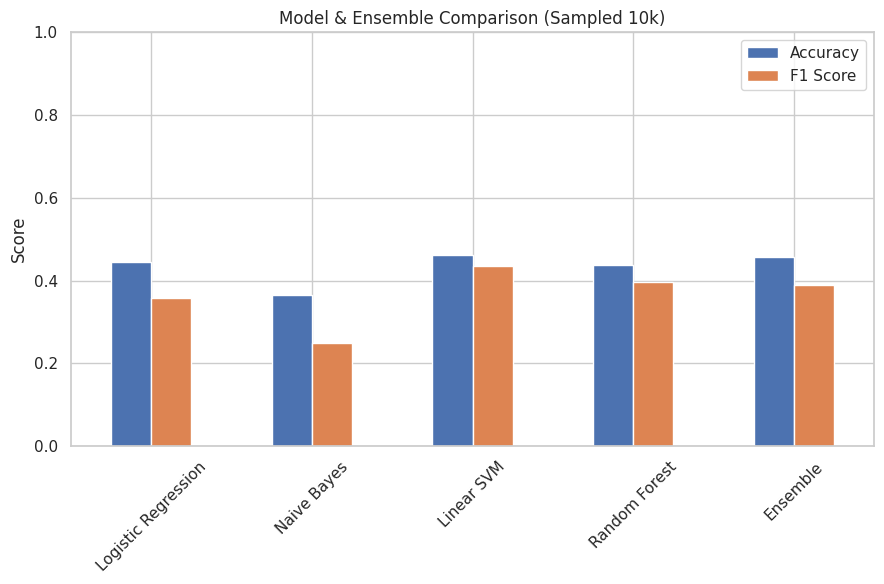

In [9]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# ===============================
# STEP 1: LOAD DATA FROM ZIP
# ===============================
zip_path = "archive (2).zip"

with zipfile.ZipFile(zip_path, "r") as zf:
    with zf.open("News_Category_Dataset_v3.json") as f:
        df = pd.read_json(f, lines=True)

# ===============================
# STEP 2: PREPARE TEXT + TARGET
# ===============================
df["headline"] = df["headline"].fillna("")
df["short_description"] = df["short_description"].fillna("")
df["text"] = df["headline"] + " " + df["short_description"]

# smaller sample for speed
df = df.sample(10000, random_state=42)

X = df["text"]
y = df["category"]

# ===============================
# STEP 3: TRAIN/TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# STEP 4: TF-IDF
# ===============================
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ===============================
# STEP 5: BASE MODELS
# ===============================
log_reg = LogisticRegression(max_iter=200)
nb = MultinomialNB()
svm = LinearSVC()
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

# ===============================
# STEP 6: ENSEMBLE
# ===============================
ensemble = VotingClassifier(
    estimators=[
        ("lr", log_reg),
        ("nb", nb),
        ("svm", svm),
        ("rf", rf),
    ],
    voting="hard"
)

# ===============================
# STEP 7: TRAIN + EVAL
# ===============================
ensemble.fit(X_train_tfidf, y_train)
y_pred = ensemble.predict(X_test_tfidf)

print("\nClassification Report (Ensemble):\n")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"Ensemble Accuracy: {acc:.4f}")
print(f"Ensemble F1 Score: {f1:.4f}")

# ===============================
# STEP 8: Compare with Individual Models
# ===============================
models = {
    "Logistic Regression": log_reg,
    "Naive Bayes": nb,
    "Linear SVM": svm,
    "Random Forest": rf,
}

results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    }

# add ensemble
results["Ensemble"] = {"Accuracy": acc, "F1 Score": f1}

df_results = pd.DataFrame(results).T
print("\nModel Comparison:\n", df_results)

df_results.plot(kind="bar", figsize=(9,6))
plt.title("Model & Ensemble Comparison (Sampled 10k)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.tight_layout()
plt.show()
